# Self-Organizing Map (SOM) - Mega Case Study

Notebook ini berdasarkan kursus __Deep Learning A-Z™: Hands-On Artificial Neural Networks__ di Udemy. [Lihat Kursus](https://www.udemy.com/deeplearning/).

## Informasi Notebook
- __notebook name__: `taruma_udemy_som_megacasestudy`
- __notebook version/date__: `1.0.0`/`20190729`
- __notebook server__: Google Colab
- __python version__: `3.6`
- __keras version__: `2.2.4`

In [1]:
#### NOTEBOOK DESCRIPTION

from datetime import datetime

NOTEBOOK_TITLE = 'taruma_udemy_som_megacasestudy'
NOTEBOOK_VERSION = '1.0.0'
NOTEBOOK_DATE = 1 # Set 1, if you want add date classifier

NOTEBOOK_NAME = "{}_{}".format(
    NOTEBOOK_TITLE, 
    NOTEBOOK_VERSION.replace('.','_')
)
PROJECT_NAME = "{}_{}{}".format(
    NOTEBOOK_TITLE, 
    NOTEBOOK_VERSION.replace('.','_'), 
    "_" + datetime.utcnow().strftime("%Y%m%d_%H%M") if NOTEBOOK_DATE else ""
)

print(f"Nama Notebook: {NOTEBOOK_NAME}")
print(f"Nama Proyek: {PROJECT_NAME}")

Nama Notebook: taruma_udemy_som_megacasestudy_1_0_0
Nama Proyek: taruma_udemy_som_megacasestudy_1_0_0_20190729_1110


In [41]:
#### System Version
import sys
import keras
print("versi python: {}".format(sys.version))
print("versi keras: {}".format(keras.__version__))

versi python: 3.6.8 (default, Jan 14 2019, 11:02:34) 
[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]
versi keras: 2.2.4


In [0]:
#### Load Notebook Extensions
%load_ext google.colab.data_table

In [3]:
#### Download dataset
!wget -O SOM_megacase.zip "https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P16-Mega-Case-Study.zip"
!unzip SOM_megacase.zip

--2019-07-29 11:33:46--  https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P16-Mega-Case-Study.zip
Resolving sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)... 52.219.100.144
Connecting to sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)|52.219.100.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20790 (20K) [application/zip]
Saving to: ‘SOM_megacase.zip’

SOM_megacase.zip    100%[===================>]  20.30K  --.-KB/s    in 0.02s   

2019-07-29 11:33:46 (897 KB/s) - ‘SOM_megacase.zip’ saved [20790/20790]

Archive:  SOM_megacase.zip
   creating: Mega_Case_Study/
  inflating: Mega_Case_Study/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/Mega_Case_Study/
  inflating: __MACOSX/Mega_Case_Study/._.DS_Store  
  inflating: Mega_Case_Study/ann.py  
  inflating: __MACOSX/Mega_Case_Study/._ann.py  
  inflating: Mega_Case_Study/Credit_Card_Appli

In [0]:
#### Atur dataset path
DATASET_DIRECTORY = 'Mega_Case_Study/'

# STEP 1-2

In [0]:
# Mega Case Study - Make a Hybrid Deep Learning Model
# Part 1 - Identifying the Frauds with the Self-Organizing Map

In [12]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the dataset
# Dataset http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)
dataset = pd.read_csv(DATASET_DIRECTORY + 'Credit_Card_Applications.csv')
dataset

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
5,15571121,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
6,15726466,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0
7,15660390,0,58.67,4.460,2,11,8,3.040,1,1,6,0,2,43,561,1
8,15663942,1,27.83,1.000,1,2,8,3.000,0,0,0,0,2,176,538,0
9,15638610,0,55.75,7.080,2,4,8,6.750,1,1,3,1,2,100,51,0


In [13]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(f"X Dimension = {X.shape}")
print(f"y Dimension = {y.shape}")

X Dimension = (690, 15)
y Dimension = (690,)


In [0]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

In [15]:
# Or using pip install (recent version minisom)
!pip install minisom

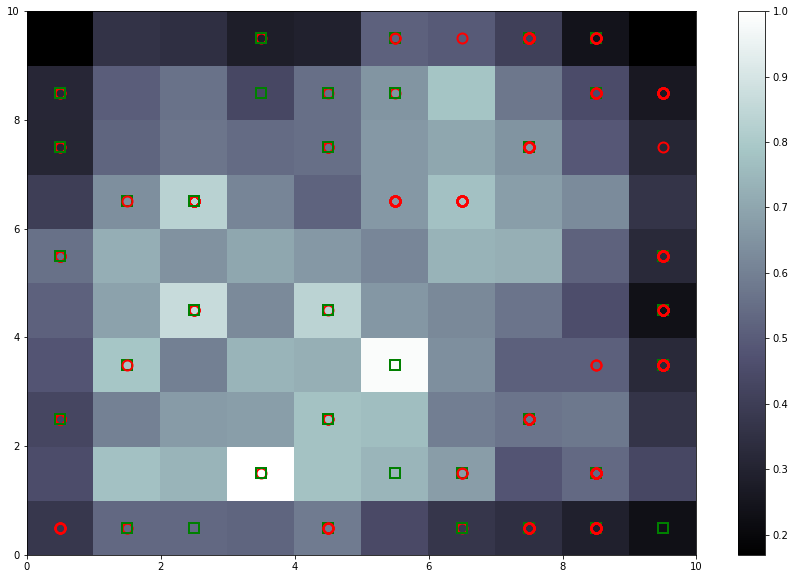

In [16]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor=colors[y[i]],
         markerfacecolor='None',
         markersize=10,
         markeredgewidth=2)
show()

In [19]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(3, 1)], mappings[(5, 3)]), axis=0)
frauds = sc.inverse_transform(frauds)
pd.DataFrame(frauds)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15790254.0,0.0,18.92,9.000,2.0,6.0,4.0,0.750,1.0,1.0,2.0,0.0,2.0,88.0,592.0
1,15768600.0,0.0,22.42,5.665,2.0,11.0,4.0,2.585,1.0,1.0,7.0,0.0,2.0,129.0,3258.0
2,15748552.0,0.0,30.67,12.000,2.0,8.0,4.0,2.000,1.0,1.0,1.0,0.0,2.0,220.0,20.0
3,15757467.0,0.0,52.83,15.000,2.0,8.0,4.0,5.500,1.0,1.0,14.0,0.0,2.0,0.0,2201.0
4,15682576.0,0.0,32.17,1.460,2.0,9.0,4.0,1.085,1.0,1.0,16.0,0.0,2.0,120.0,2080.0
5,15801441.0,0.0,35.75,0.915,2.0,6.0,4.0,0.750,1.0,1.0,4.0,0.0,2.0,0.0,1584.0
6,15815443.0,0.0,57.08,19.500,2.0,8.0,4.0,5.500,1.0,1.0,7.0,0.0,2.0,0.0,3001.0
7,15748432.0,0.0,58.33,10.000,2.0,11.0,4.0,4.000,1.0,1.0,14.0,0.0,2.0,0.0,1603.0
8,15708714.0,0.0,18.75,7.500,2.0,11.0,4.0,2.710,1.0,1.0,5.0,0.0,2.0,184.0,26727.0
9,15788131.0,0.0,29.50,0.460,2.0,4.0,4.0,0.540,1.0,1.0,4.0,0.0,2.0,380.0,501.0


# STEP 3

In [22]:
# Part 2 - Going from Unsupervised to Supervised Deep Learning
# Creating the matrix of features
customers = dataset.iloc[:, 1:].values
print(f"customers.shape = {customers.shape}")

customers.shape = (690, 15)


In [24]:
# Creating the dependent variable
is_fraud = np.zeros(len(dataset))
is_fraud.shape

(690,)

In [0]:
for i in range(len(dataset)):
    if dataset.iloc[i, 0] in frauds:
        is_fraud[i] = 1

In [0]:
# Artificial Neural Networks
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [30]:
# Importing Keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()
classifier.add(Dense(
    units=2, kernel_initializer='uniform', activation='relu', input_dim=15)
)
classifier.add(Dense(
    units=1, kernel_initializer='uniform', activation='sigmoid')
)
classifier.compile(
    optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']
)
classifier.fit(customers, is_fraud, batch_size=1, epochs=2)

W0729 11:53:01.020379 140013657868160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0729 11:53:01.070838 140013657868160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0729 11:53:01.084968 140013657868160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0729 11:53:01.126218 140013657868160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0729 11:53:01.151633 140013657868160 deprecation_wrappe

Epoch 1/2
690/690 [==============================] - 1s 2ms/step - loss: 0.4658 - acc: 0.9507
Epoch 2/2
690/690 [==============================] - 1s 1ms/step - loss: 0.1886 - acc: 0.9507


# STEP 4

In [40]:
y_pred = classifier.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis=1)
y_pred = y_pred[y_pred[:, 1].argsort()]
pd.DataFrame(y_pred[:, :])

,0,1
0,15643056.0,0.007181
1,15679622.0,0.007770
2,15787229.0,0.007988
3,15600975.0,0.008000
4,15713983.0,0.008211
5,15676156.0,0.008303
6,15680901.0,0.009114
7,15711635.0,0.009177
8,15788215.0,0.009282
9,15701885.0,0.009657
